<a href="https://colab.research.google.com/github/pghatani0811/Logistric-Regression/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data =pd.read_csv('/content/drive/MyDrive/portu_banking_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [4]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# Data Cleaning

In [5]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [6]:
data['age'] = data['age'].replace(to_replace=['18-25','30-35','35-30','25-30','30-32','45-50','20-25','20-40','35-40','30-40','50-55'],value=['22','33','32','28','30','48','23','36','38','33','52'])

In [7]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [8]:
df = data.copy()

In [9]:
df['age'] = pd.to_numeric(df['age'],errors='coerce')

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [11]:
df['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [12]:
df = df.replace(to_replace=['RETIRED','SERVICES','STUDENT','ADMIN.','MANAGEMENT','TECHNICIAN','BLUE-COLLAR','HOUSEMAID','UNKNOWN','admin.'],value=['retired','services','student','admin.','management','technician','blue-collar','housemaid','admin.','admin.'])

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [14]:
df['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [15]:
df = df.replace(to_replace=['M','D','S','unknown'],value=['married','divorced','single','married'])

In [16]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
married                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [17]:
df = df.replace(to_replace = ['basic-4y','basic-9y','basic-6y','unknown'],value=['basic.4y','basic.9y','basic.6y','university.degree'])

In [18]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
married                 1731
illiterate                18
Name: education, dtype: int64

# Grouping Columns

In [19]:
df.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910857,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [20]:
df.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.188333,254.292910,2.623621,956.050465,0.189005,0.015667,93.534098,-40.245064,3.550400,5164.127929,0.129713
blue-collar,39.555868,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360123,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
married,45.544073,240.240122,2.644377,938.544073,0.155015,0.355623,93.718106,-38.805167,3.946252,5172.876900,0.112462
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947924,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381


In [21]:
df.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.447208,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061704,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998844,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
married,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003
professional.course,40.079725,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877959,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245


In [22]:
df.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.898959,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.300504,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,33.158195,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,married,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,married,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


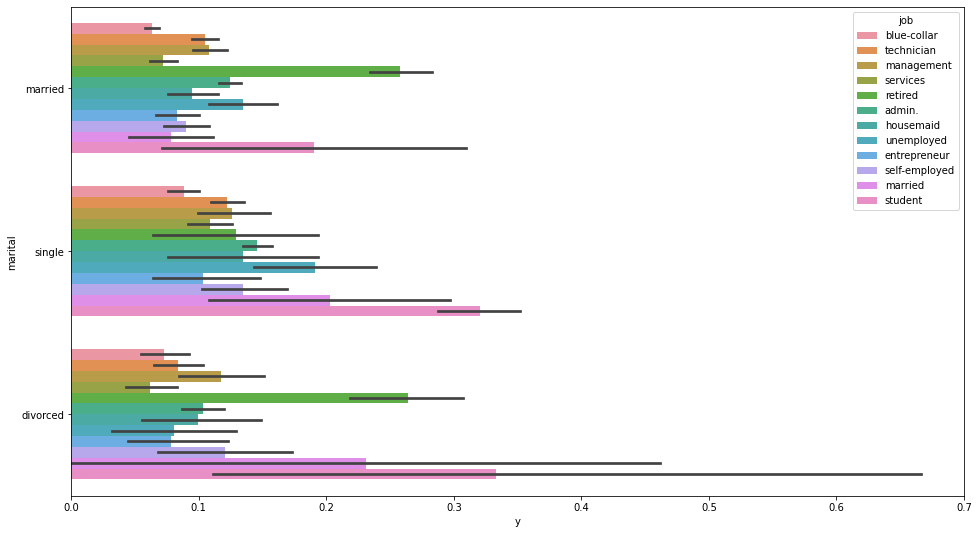

In [24]:
plt.figure(figsize=(16,9))
sns.barplot(x = 'y',y='marital',hue='job',data=df)

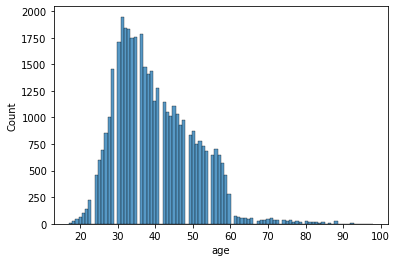

In [25]:
sns.histplot(df.age)

(array([1.6660e+03, 1.1344e+04, 1.2036e+04, 8.0880e+03, 5.8220e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

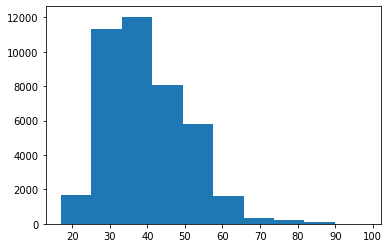

In [26]:
plt.hist(df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

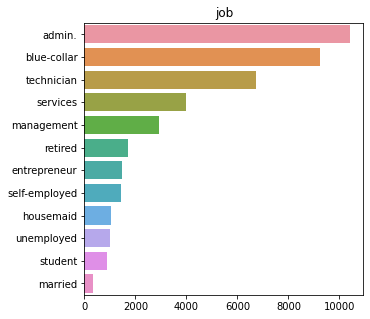

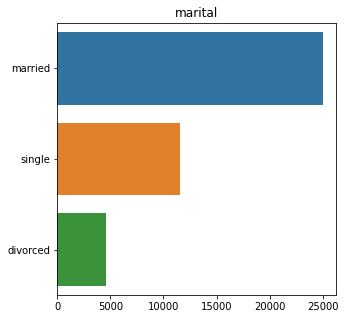

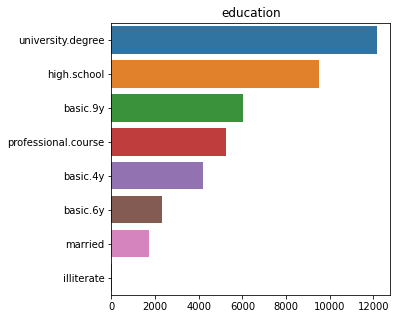

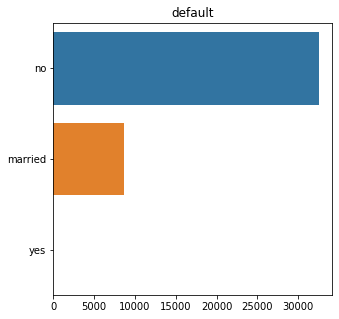

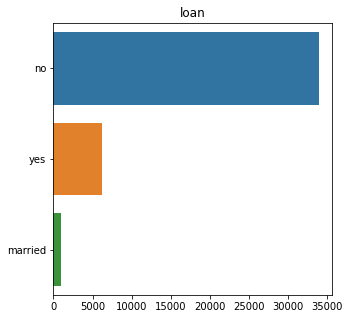

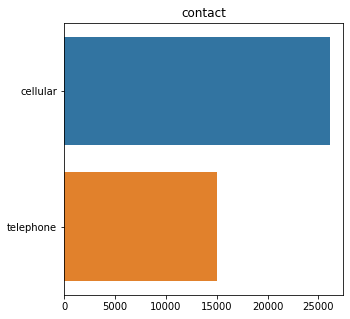

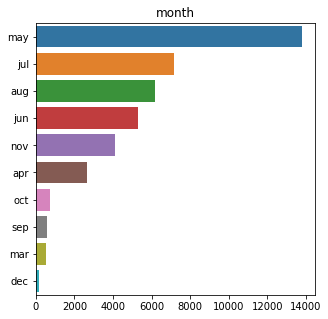

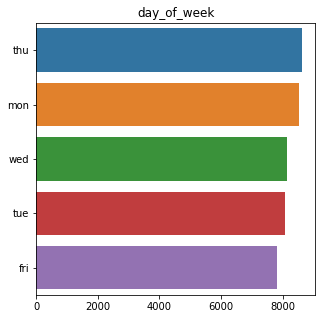

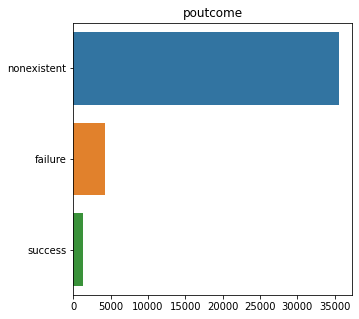

In [27]:
cols=['job','marital','education','default','loan','contact','month','day_of_week','poutcome']
for col in cols:
  plt.figure(figsize=(5,5))
  sns.barplot(df[col].value_counts().values,df[col].value_counts().index)
  plt.title(col)
plt.show()

In [28]:
obj_cols = df.select_dtypes(include='object')
obj_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,married,yes,no,cellular,aug,thu,nonexistent
1,technician,married,married,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,married,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic.4y,married,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,married,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [29]:
df1 = df
for col in obj_cols:
  dummies = pd.get_dummies(df[col],drop_first=True)
  df1 = pd.concat([df1,dummies],axis='columns')


In [30]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,44,blue-collar,married,basic.4y,married,yes,no,cellular,aug,thu,...,0,0,0,0,0,1,0,0,1,0
1,53,technician,married,married,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,0,1,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,0,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,0,0,0,0,0,0,0,1


In [31]:
obj_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [33]:
df1.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],axis=1,inplace=True)

In [34]:
df1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'married',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'married', 'single', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'married', 'professional.course',
       'university.degree', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'telephone',
       'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon',
       'thu', 'tue', 'wed', 'nonexistent', 'success'],
      dtype='object')

In [37]:
X = df1.drop('y',axis=1)
y = df1['y']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [40]:
model.score(X_train,y_train)

0.9121103233951636

In [41]:
model.score(X_test,y_test)

0.9053122268621929

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9111
           1       0.64      0.42      0.50      1186

    accuracy                           0.91     10297
   macro avg       0.78      0.69      0.73     10297
weighted avg       0.89      0.91      0.90     10297



In [45]:
print(accuracy_score(y_test,y_pred))

0.9053122268621929


In [46]:
print(confusion_matrix(y_test,y_pred))

[[8827  284]
 [ 691  495]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


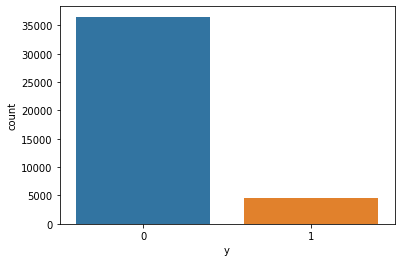

In [47]:
sns.countplot(df1['y'])

In [48]:
print('Before SMOTE, counts of label 1:',sum(y_train==1))



Before SMOTE, counts of label 1: 3454


In [49]:
print('Before SMOTE, counts of label 0:',sum(y_train==0))


Before SMOTE, counts of label 0: 27437


In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train.values,y_train.ravel())
print('After SMOTE,counts of label 1:',sum(y_train_sm==1))
print('After SMOTE,counts of label 0:',sum(y_train_sm==0))

After SMOTE,counts of label 1: 27437
After SMOTE,counts of label 0: 27437


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


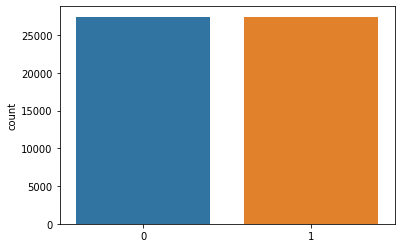

In [52]:
sns.countplot(y_train_sm)

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X_train_sm,y_train_sm,test_size=0.25,random_state=42)


In [54]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [55]:
model.score(X_train,y_train)

0.8686915320131211

In [56]:
model.score(X_test,y_test)

0.8693053429550259

In [57]:
y_preds = model.predict(X_test)
y_preds

array([1, 0, 1, ..., 0, 1, 1])

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6822
           1       0.86      0.88      0.87      6897

    accuracy                           0.87     13719
   macro avg       0.87      0.87      0.87     13719
weighted avg       0.87      0.87      0.87     13719



In [59]:
print(accuracy_score(y_test,y_preds))

0.8693053429550259


In [60]:
print(confusion_matrix(y_test,y_preds))

[[5855  967]
 [ 826 6071]]


In [62]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
rfe = RFE(model,n_features_to_select=None)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)

[False False  True False  True False False  True  True False False  True
 False  True False  True False  True  True False False False  True False
  True False False  True False  True  True False  True False  True False
  True  True False  True False  True  True  True  True False  True False
 False  True False  True]


In [63]:
print(rfe.ranking_)

[22 19  1 25  1  3  2  1  1 11  7  1 21  1 17  1 16  1  1  6 14  8  1 15
  1 10 26  1 18  1  1 27  1 12  1  5  1  1 23  1  9  1  1  1  1 20  1 24
  4  1 13  1]
